In [1]:
# vector_fields.py contains a bunch of tools to visualize vector fields and related objects
# this line is mainly needed to run the notebook in google colab or kaggle
_ = !wget https://raw.githubusercontent.com/JeremiasE/worksheets-ode-2025/main/tools/vector_fields.py

In [1]:
import scipy
import scipy.integrate

import sympy 
from sympy import sin, exp,sqrt,sign,cos, Max,pi, log
from sympy.utilities import lambdify
import numpy as np

import matplotlib.pyplot as plt
import vector_fields


In [2]:
(t,x) = sympy.var("t,x")
(t,x) = sympy.var("t,x")

In [3]:
def euler_path(f,variables,t0,x0,step_size,num_steps):
    f = sympy.lambdify(variables,f,"math")
    times = np.zeros(num_steps+1)
    values = np.zeros(num_steps+1)
    t = t0
    x = x0
    for i in range(num_steps+1):
        times[i] = t
        values[i] = x
        x += step_size*f(t,x)
        t += step_size
    return times, values
    

In [4]:
def solve_non_autonomous_ivp(f,time_var, space_vars,t_range,initial_value,max_step=0.1):
    fcomponents = [lambdify([time_var]+list(space_vars),fc) for fc in f]
    def right_hand_side(t,y):
        return tuple(fc(t,*y) for fc in fcomponents)
    solution = scipy.integrate.solve_ivp(right_hand_side, t_range,initial_value, max_step=0.1)
    return solution

def plot_solution_non_autonomous(f, time_var, space_vars,initial_value, t_1=12,ax = None,**kwargs):
    solution = solve_non_autonomous_ivp(f,time_var, space_vars,(0,t_1),initial_value)
    if (ax is None):
        fig = plt.figure()
        ax = fig.subplots(1,1)
    ax.plot(solution.t,solution.y[0,:],**kwargs)
    return ax


In [5]:
cm = vector_fields.truncate_colormap(plt.get_cmap("Blues"),0.4,0.9)

# Euler-Polygonzüge

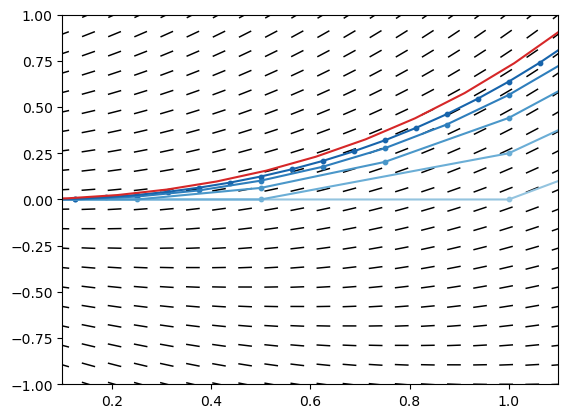

In [6]:
f = t+x
x0 = 0.0
t0 = 0.0

ax = vector_fields.plot_slope_field(f,(t,0.1,1.1),(x,-1,1),numpoints=20);
step_sizes = [1,1/2,1/4,1/8,1/16]
for (i,step_size) in enumerate(step_sizes):
    (tv,xv) = euler_path(f,(t,x),t0,x0,step_size,int(5/step_size))
    ax.plot(tv,xv,color=cm(i/len(step_sizes)));
    ax.scatter(tv,xv,color=cm(i/len(step_sizes)), s=10);
ax.set_ylim(-1,1.0)
plot_solution_non_autonomous([f],t,(x,),(x0,),5,color="tab:red",ax=ax)
plt.show()

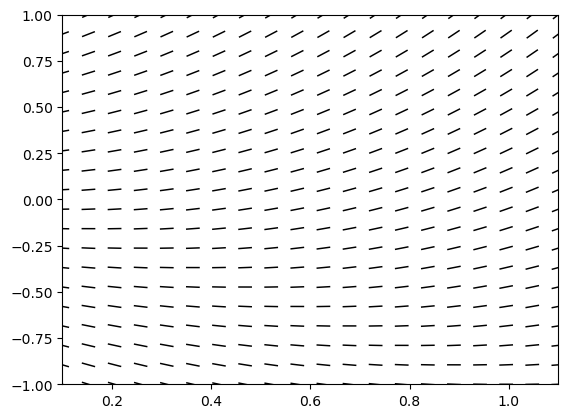

In [7]:
f = t+x
x0 = 0.0
ax = vector_fields.plot_slope_field(f,(t,0.1,1.1),(x,-1,1),numpoints=20);
ax.figure.savefig("field.png")

# Ein Beispiel, für das die Euler-Polygonzüge nicht konvergieren

$f(t,x) = 4 \cos{\left(\frac{\pi \log{\left(t \right)}}{\log{\left(2 \right)}} \right)} \max\left(0, t - \frac{\left|{x}\right|}{t}\right) + 4 \sqrt{\left|{x}\right|} \operatorname{sign}{\left(x \right)}$

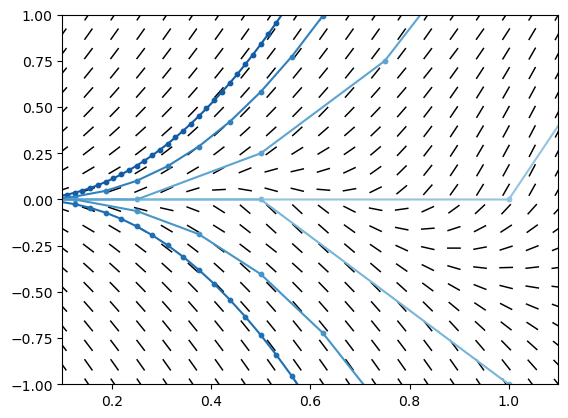

In [8]:
f = sympy.Piecewise(
    (4*(sign(x)*sympy.sqrt(abs(x))+Max(0,t-abs(x)/t)*cos(pi*log(t)/log(2))),t>0.01),
    (4*(sign(x)*sympy.sqrt(abs(x))), True)
)

x0 = 0.0
t0 = 0.0

ax = vector_fields.plot_slope_field(f,(t,0.1,1.1),(x,-1,1),numpoints=20);
step_sizes = [1,1/2,1/4,1/8,1/16,1/32,1/64,]
for (i,step_size) in enumerate(step_sizes):
    (tv,xv) = euler_path(f,(t,x),0.000001,x0,step_size,int(5/step_size))
    ax.plot(tv,xv,color=cm(i/len(step_sizes)));
    ax.scatter(tv,xv,color=cm(i/len(step_sizes)), s=10);
ax.set_ylim(-1,1.0)
#plot_solution_non_autonomous([f],t,(x,),(0.2,),5,color="tab:red",ax=ax)
ax.figure.savefig("euler2.png")